<a href="https://colab.research.google.com/github/jayuan101/Crime-Predication-/blob/main/Project_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# *** Google Colab Prep ***#
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/NYPD_Complaint_Data_Historic.csv')

Mounted at /content/drive
Mounted at /content/NYPD_Complaint_Data_Historic.csv


# import library

In [ ]:
# simplify the package in a short name. Below are the standard names people use for Pandas, Numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# The key is the classifier acronym and the value is the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# The key is the classifier acronym and the value is the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
%matplotlib auto
%matplotlib inline
# from fbprophet import Prophet

Using matplotlib backend: agg


#Importing CSV files

In [ ]:
# import dataset with the read_csv function from pandas, giving it the URL for CSV file, and assigning the resulting dataframe to data_crime.
data_crime = pd.read_csv('/content/NYPD_Complaint_Data_Historic.csv/MyDrive/NYPD_Complaint_Data_Historic.csv' ,low_memory = False)
types = data_crime.OFNS_DESC.unique()

In [ ]:
crime_map = pd.read_csv('/content/NYPD_Complaint_Data_Historic.csv/MyDrive/Crime_Map_.csv')

# Previewing dataframes

In [ ]:
data_crime

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,NaN,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,NaN,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,NaN,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M


In [ ]:
print(str(types))

['DANGEROUS WEAPONS' 'FORGERY' 'HARRASSMENT 2' 'MISCELLANEOUS PENAL LAW'
 'MURDER & NON-NEGL. MANSLAUGHTER' 'BURGLARY' 'DANGEROUS DRUGS'
 'PETIT LARCENY' 'OFF. AGNST PUB ORD SENSBLTY &' 'GRAND LARCENY'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'ARSON' 'RAPE'
 'SEX CRIMES' 'GRAND LARCENY OF MOTOR VEHICLE' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'THEFT-FRAUD' 'VEHICLE AND TRAFFIC LAWS'
 'CRIMINAL TRESPASS' 'OFFENSES INVOLVING FRAUD' 'FRAUDS'
 'OFFENSES AGAINST PUBLIC ADMINI' 'OFFENSES AGAINST THE PERSON'
 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING' 'ESCAPE 3'
 'NYS LAWS-UNCLASSIFIED FELONY' 'POSSESSION OF STOLEN PROPERTY'
 'THEFT OF SERVICES' 'KIDNAPPING & RELATED OFFENSES'
 'OTHER OFFENSES RELATED TO THEF' 'UNAUTHORIZED USE OF A VEHICLE'
 "BURGLAR'S TOOLS" 'ENDAN WELFARE INCOMP' 'FRAUDULENT ACCOSTING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' 'GAMBLING'
 'PETIT LARCENY OF MOTOR VEHICLE' 'ALCOHOLIC BEV

In [ ]:
crime_map

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,240211996,40,BRONX,06/05/2021,19:23:00,NaN,(null),COMPLETED,(null),N.Y. TRANSIT POLICE,...,(null),273.0,"TAMPERING 1,CRIMINAL",TRANSIT - NYC SUBWAY,02/07/2022,1005028,234516,40.810352,-73.924942,"(40.8103518634571, -73.924942325642)"
1,238497788,7,MANHATTAN,01/01/2022,04:00:00,01/01/2022,06:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,01/01/2022,988917,200245,40.716310,-73.983166,"(40.7163099917327, -73.9831660136947)"
2,243004090,105,QUEENS,01/01/2019,00:00:00,12/31/2019,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),175.0,"SEXUAL ABUSE 3,2",RESIDENCE-HOUSE,04/02/2022,1057738,204079,40.726529,-73.734865,"(40.7265293769835, -73.7348645378882)"
3,243090517,47,BRONX,03/01/2020,00:01:00,12/31/2020,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE-HOUSE,04/02/2022,1025177,268368,40.903188,-73.851944,"(40.903188, -73.851944)"
4,245183845,94,BROOKLYN,05/16/2000,20:00:00,05/28/2005,00:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,05/15/2022,997282,204143,40.727001,-73.952983,"(40.7270006940205, -73.9529831112437)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209824,245890874,75,BROOKLYN,05/31/2022,17:45:00,05/31/2022,17:46:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),101.0,ASSAULT 3,GAS STATION,05/31/2022,1020932,185703,40.676313,-73.867754,"(40.676313, -73.867754)"
209825,245956536,104,QUEENS,05/31/2022,14:15:00,05/31/2022,14:30:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,1013160,197457,40.708604,-73.895723,"(40.708604, -73.895723)"
209826,246008200,25,MANHATTAN,05/31/2022,21:00:00,06/02/2022,21:15:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",BRIDGE,05/31/2022,1002640,231748,40.802751,-73.933575,"(40.80275148, -73.93357496)"
209827,245914266,67,BROOKLYN,05/31/2022,19:37:00,05/31/2022,19:55:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,997513,174246,40.644932,-73.952204,"(40.644932, -73.952204)"


In [ ]:
# grouping 'BORO_NM', and then aggregate dataframe by values ​​of CMPLNT_NUM and counts and show it.
boro_cries = data_crime.groupby(['BORO_NM']).agg({'CMPLNT_NUM':'count'})

# sort the rows data in dataframe to see the number of crimes from high to low
top_crimes = boro_cries.sort_values('CMPLNT_NUM', ascending=False)

top_crimes.head() 


,CMPLNT_NUM
BORO_NM,
BROOKLYN,2313143
MANHATTAN,1882292
BRONX,1693981
QUEENS,1561712
STATEN ISLAND,361891


In [ ]:
# Calculate the proportion of crime rate in each region as a whole
top_crimes_prop = top_crimes.assign(propotion = top_crimes.CMPLNT_NUM / sum(top_crimes.CMPLNT_NUM))

top_crimes_prop = top_crimes_prop.reset_index()

In [ ]:
# Extracting information from the streetnames
for i in data_crime['PREM_TYP_DESC'][0:10]:
    print(i)

STREET
STREET
STREET
STREET
nan
RESIDENCE - APT. HOUSE
STREET
STREET
STREET
STREET


In [ ]:
data_crime.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [ ]:
# Replacing the NaN values of the text column with the corresponding title value 
data_crime.fillna(0)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,0,0,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,0,0.0,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,0,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,0,0.0,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,0,0,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,0.0,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,0,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,0,0,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,0.0,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,0,0,0.0,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,0.0,...,0,0.0,40.698827,-73.938819,"(40.698827283, -73.938819047)",0,0,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,0,0.0,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,0,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,0.0,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,0,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,0.0,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,0,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,0.0,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,0,<18,BLACK,M


In [ ]:
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [ ]:
print('The shape of our features is:', data_crime.shape)

The shape of our features is: (7825499, 35)


In [ ]:
# Descriptive statistics for each column
data_crime.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,34.000000,5.965727e+01,-7.368479e+01


In [ ]:
#dropping rows with NaN values
data_crime.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
data_crime.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

data_crime.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

data_crime.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
data_crime.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
data_crime.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
data_crime.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
data_crime.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", data_crime.shape[0])
print("Variables: ", data_crime.shape[1])

Clean dataset: 
Observations:  7776644
Variables:  19


In [ ]:
#examing the changes
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,937","238,365",40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,"1,022,508","261,990",40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,12/29/2019,578,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,"1,034,178","209,758",40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,"1,026,412","258,211",40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
5,293718737,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,"989,665","201,866",40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M


In [ ]:
data_crime.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OTHER STATE LAWS 

In [ ]:
data_crime_clean = data_crime.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

In [ ]:
data_crime_clean.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARASSMENT',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'BURGLARY', 'DANGEROUS DRUGS', 'PETIT LARCENY',
       'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF', 'THEFT-FRAUD', 'VEHICLE AND TRAFFIC LAWS',
       'CRIMINAL TRESPASS', 'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING', 'ESCAPE',
       'NYS LAWS-UNCLASSIFIED FELONY', 'POSSESSION OF STOLEN PROPERTY',
       'THEFT OF SERVICES', 'KIDNAPPING & RELATED OFFENSES',
       'OTHER OFFENSES RELATED TO THEF', 'UNAUTHORIZED USE OF A VEHICLE',
       "BURGLAR'S TOOLS", 'ENDANGERING WELFARE OF INCOMPETENT',
       'FRAUDULENT ACCOSTING', 'AGRICULTURE & MARKETS LAW',

In [ ]:
data_crime_clean.OFNS_DESC.value_counts().iloc[:10]

PETIT LARCENY                                   1331246
HARASSMENT                                      1020122
ASSAULT & RELATED OFFENSES                       822614
CRIMINAL MISCHIEF                                789690
GRAND LARCENY                                    679846
DANGEROUS DRUGS                                  434802
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     400650
FELONY ASSAULT                                   308894
ROBBERY                                          280281
BURGLARY                                         267083
Name: OFNS_DESC, dtype: int64

# make a chart 

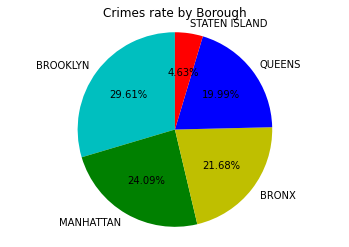

In [ ]:
# Use the proportion of crime rate in each area to make a pie chart
x = top_crimes_prop['BORO_NM']
y = top_crimes_prop['propotion']
colors = ['c', 'g', 'y', 'b', 'r']

plt.pie(top_crimes_prop['propotion'], labels=top_crimes_prop['BORO_NM'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()

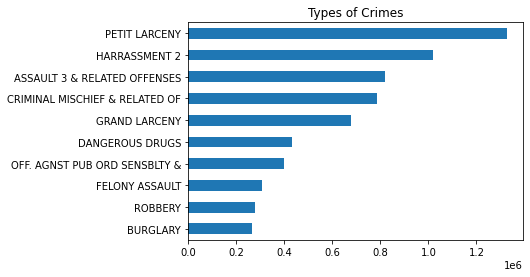

In [ ]:
data_crime.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

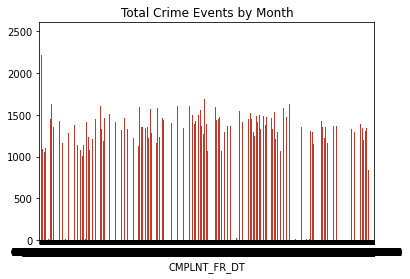

In [ ]:
data_crime.groupby('CMPLNT_FR_DT').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

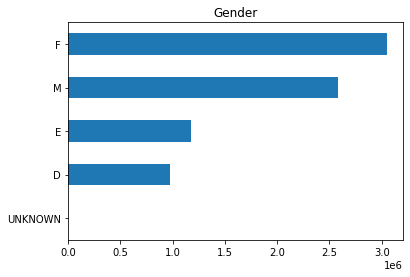

In [ ]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

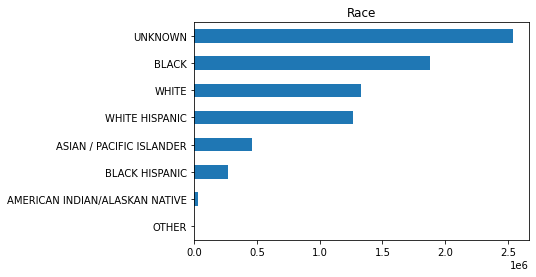

In [ ]:
data_crime.VIC_RACE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Race")

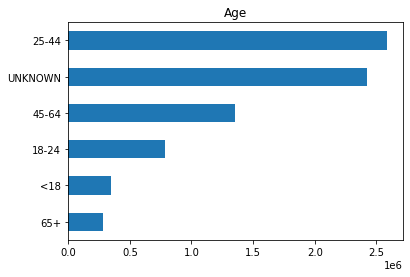

In [ ]:
data_crime.VIC_AGE_GROUP.value_counts().iloc[:6].sort_values().plot(kind="barh", title = "Age")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f313928ead0>],
      dtype=object)

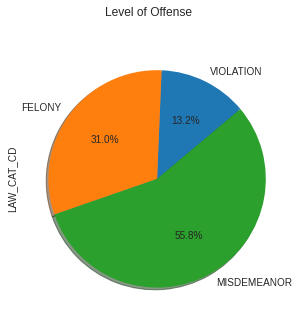

In [127]:
data_crime_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

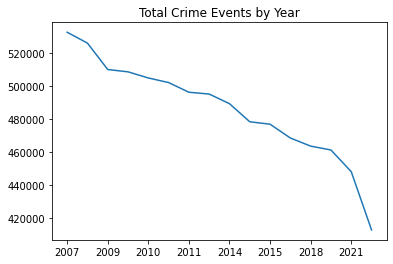

In [ ]:
data_crime_clean['year'] = data_crime_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
data_crime_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

In [ ]:
sex_crimes = data_crime_clean[data_crime.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
20,354566222,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,008,798","238,971",40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,FEMALE,2019
23,441714270,12/06/2019,11:30:00,12/19/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,N.Y. POLICE DEPT,"984,623","209,859",40.742699,-73.998655,"(40.74269929900004, -73.99865537999993)",25-44,UNKNOWN,FEMALE,2019
32,916011284,12/15/2019,09:30:00,12/15/2019,116,SEX CRIMES,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,006,434","244,344",40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",<18,BLACK,FEMALE,2019
34,465522474,12/05/2019,22:00:00,12/15/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,794","241,252",40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",25-44,WHITE,FEMALE,2019
38,954653095,11/15/2017,20:00:00,12/13/2019,104,RAPE,COMPLETED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,"1,036,790","205,267",40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",18-24,WHITE,FEMALE,2019


7360.5


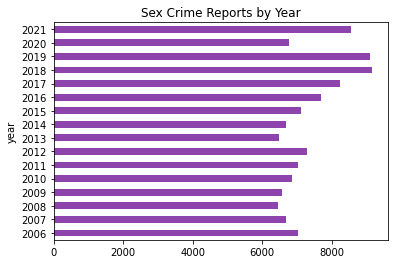

In [ ]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

FEMALE                   83.224645
MALE                     14.875858
UNKNOWN                   1.789960
BUSINESS/ORGANIZATION     0.109537
Name: VIC_SEX, dtype: float64


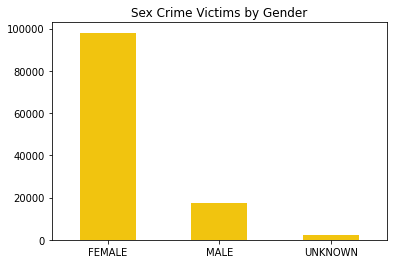

In [ ]:
#plot graph
sex_crimes['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = sex_crimes['VIC_SEX'].value_counts() / sex_crimes['VIC_SEX'].shape[0] *100
print(vic_sex_per)

BLACK                             32.663372
WHITE HISPANIC                    28.658040
WHITE                             16.543543
UNKNOWN                           10.095272
ASIAN / PACIFIC ISLANDER           6.146831
BLACK HISPANIC                     5.621221
AMERICAN INDIAN/ALASKAN NATIVE     0.269173
Name: VIC_RACE, dtype: float64


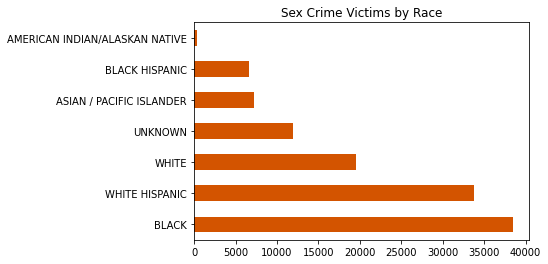

In [ ]:
#plot graph
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

<18      48.015590
25-44    23.234665
18-24    16.386455
45-64     4.997113
65+       0.594389
Name: VIC_AGE_GROUP, dtype: float64


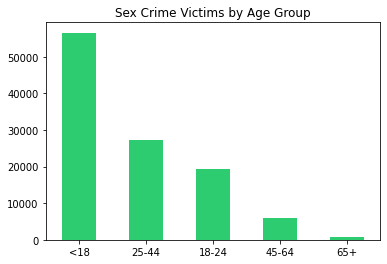

In [ ]:
#plot graph
sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Sex Crime Victims by Age Group', rot=0)

#victims by age percentage
vic_age_per = sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / sex_crimes['VIC_AGE_GROUP'].shape[0] *100
print(vic_age_per)

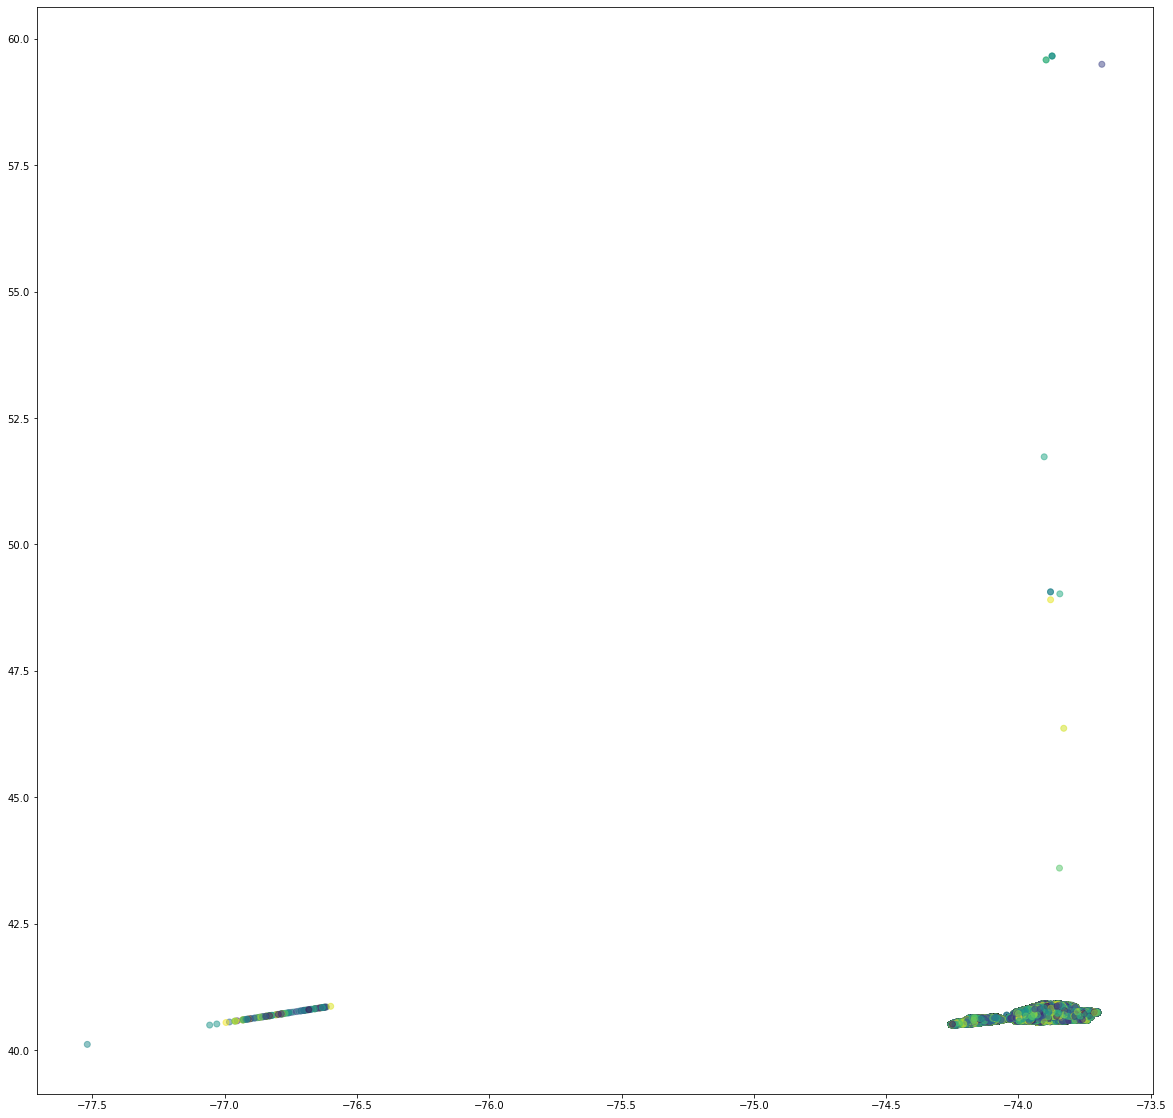

In [ ]:
colors = np.random.rand(len(data_crime['Longitude']))

plt.figure(figsize=(20,20))
plt.scatter(data_crime['Longitude'], data_crime['Latitude'],c=colors, alpha=0.5)
plt.show()

In [ ]:
#Pickup location for train dataset
import folium # goelogical map
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)
for each in crime_map[:1000].iterrows():
    folium.CircleMarker([each[1]['Latitude'],each[1]['Longitude']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['Latitude'])+','+str(each[1]['Longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1


  

In [ ]:
data_crime.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
data_crime.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [ ]:
data_crime.replace('UNKNOWN', np.NaN, inplace=True)
data_crime.replace('E', np.NaN, inplace=True)
data_crime.replace('D', np.NaN, inplace=True)
data_crime.replace('U', np.NaN, inplace=True)

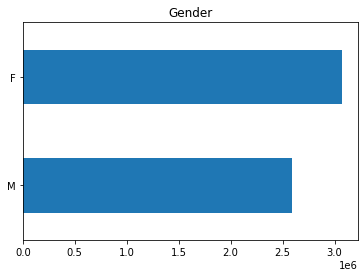

In [ ]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

In [ ]:
print('Number of rows before removing rows with missing values: ' + str(data_crime.shape[0]))
data_crime.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(data_crime.shape[0]))

Number of rows before removing rows with missing values: 7824797
Number of rows after removing rows with missing values: 0


# change Change time format

In [ ]:
# import a new library
from datetime import datetime

In [ ]:
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_MONTH'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
data_crime['CMPLNT_FR_DAY'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
data_crime['CMPLNT_FR_HOUR'] = data_crime['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))

In [ ]:
pd.unique(data_crime.CMPLNT_FR_YEAR)

array([], dtype=object)

In [ ]:
columns_remove = ['CMPLNT_FR_TM', 'CMPLNT_FR_DT','CMPLNT_FR_YEAR']
data_crime = data_crime.drop(columns_remove, axis=1)

In [ ]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         0 non-null      int64  
 1   CMPLNT_TO_DT       0 non-null      object 
 2   CMPLNT_TO_TM       0 non-null      object 
 3   ADDR_PCT_CD        0 non-null      float64
 4   RPT_DT             0 non-null      object 
 5   KY_CD              0 non-null      int64  
 6   OFNS_DESC          0 non-null      object 
 7   PD_CD              0 non-null      float64
 8   PD_DESC            0 non-null      object 
 9   CRM_ATPT_CPTD_CD   0 non-null      object 
 10  LAW_CAT_CD         0 non-null      object 
 11  BORO_NM            0 non-null      object 
 12  LOC_OF_OCCUR_DESC  0 non-null      object 
 13  PREM_TYP_DESC      0 non-null      object 
 14  JURIS_DESC         0 non-null      object 
 15  JURISDICTION_CODE  0 non-null      float64
 16  PARKS_NM           0 non-null      obj

In [ ]:
import sklearn.datasets as sk
X, y = sk.make_classification(n_samples=100000, 
                              n_features=20, n_informative=5, n_redundant=15, n_classes=2, 
                              n_clusters_per_class=1, weights=None, random_state=1)
print(X)

[[ 2.57656571  3.24612781 -0.64622871 ... -2.90208238 -0.98264403
  -3.17720116]
 [ 0.34384692  2.69883616  1.48502701 ...  1.3147015  -1.9737888
  -0.19949952]
 [-1.61250455  1.11815569  2.78083303 ...  4.42559941 -1.63478251
   2.10805308]
 ...
 [ 0.41279784  1.31780531  0.99329391 ...  2.67952445  0.03277947
  -0.1288425 ]
 [-1.92539558 -1.91328115  0.01976195 ... -1.20717635 -0.76080953
   1.9379874 ]
 [-1.6662292  -0.08106429  1.60372389 ...  1.41862756  0.18612312
   1.16064143]]




```
# Traning  Data
```

#30% traning 70% testing

In [ ]:
X_test = data_crime.drop('LAW_CAT_CD', axis = 1)
y_test = data_crime['LAW_CAT_CD'].copy().to_frame()
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (100000, 20)
y shape: (100000,)


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Randomly choose 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)# Data scaling the X set

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (70000, 20)
Training Labels Shape: (70000, 20)
Testing Features Shape: (30000,)
Testing Labels Shape: (30000,)


# Predications

# **LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Initializing the LDA estimator
lda = LinearDiscriminantAnalysis()

In [ ]:
# Performing LDA
X_lda = lda.fit_transform(X, y)

In [ ]:
lda.score(X_train, y_train)

0.9458142857142857

In [ ]:
lda.predict(X)

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Assigning predicted y values
y_pred = lda.predict(X)

# Creating confusion matrix
confusion_matrix(y_true=y, y_pred=y_pred)
# array([[397,  27],     # First row:  true negatives, false positives
#        [225,  65]])    # Second row: false negatives, true positives

# Getting individual values
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


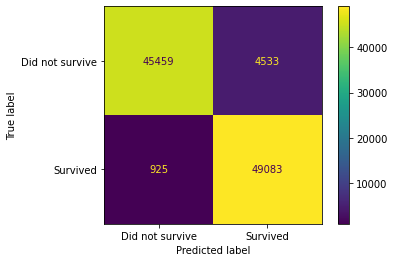

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=lda,
                      X=X,
                      y_true=y,
                      display_labels=["0", "1"])

In [ ]:
print(classification_report(y_true=y, 
                                y_pred=y_pred, 
                                target_names=["0", "1"]))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94     49992
           1       0.92      0.98      0.95     50008

    accuracy                           0.95    100000
   macro avg       0.95      0.95      0.95    100000
weighted avg       0.95      0.95      0.95    100000



In [ ]:
probs = lda.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

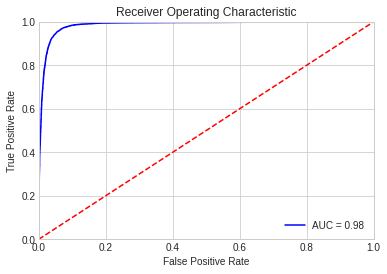

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

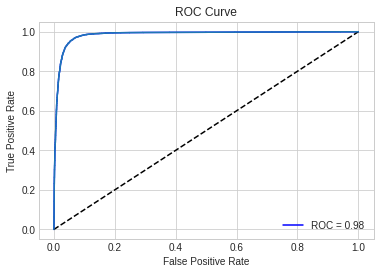

In [ ]:
from sklearn.metrics import roc_curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lda.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 95.674823086981
Specificity:  95.674823086981




```
# **SVM**
```

# SVM

In [ ]:
from sklearn.svm import LinearSVC
svclassifier = LinearSVC(class_weight='balanced')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(class_weight='balanced')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
Classifier_predications = svclassifier.predict(X_test)
print (accuracy_score(y_test, Classifier_predications)*100)

95.67999999999999


In [ ]:
from sklearn.metrics import accuracy_score
ypred=svclassifier.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9568
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14320
           1       0.98      0.94      0.96     15680

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000

Confusion matrix:
[[13994   970]
 [  326 14710]]


ROC: 0.984


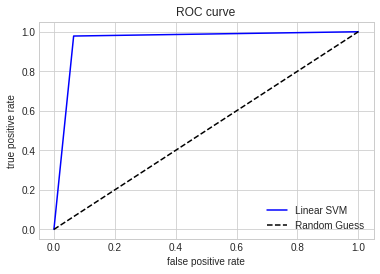

In [ ]:
from sklearn.metrics import roc_auc_score
decision_scores = svclassifier.decision_function(X_test)
fpr,tpr,_=roc_curve(y_test,y_pred)
print('ROC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

ROC AUC: 0.9567


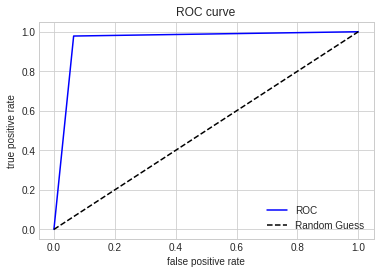

In [ ]:
from sklearn.metrics import roc_auc_score
fpr,tpr,_= roc_curve(y_test,y_pred)

score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")
# roc curve
plt.plot(fpr, tpr, "b", label='ROC')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9783187017823889


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9772346368715084




```
### Random Forest
```

#Random Forest

In [ ]:
# Training with Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()


Test confusion_matrix


Text(36.5, 0.5, 'True')

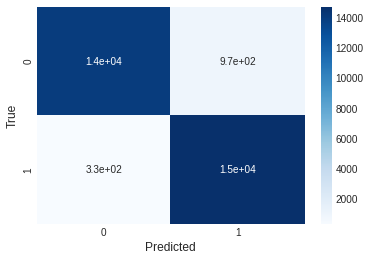

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [ ]:
#print classification report for model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     14964
           1       0.97      0.98      0.98     15036

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [ ]:
probas_ = rf.fit(X_train, y_train).predict_proba(X_test)

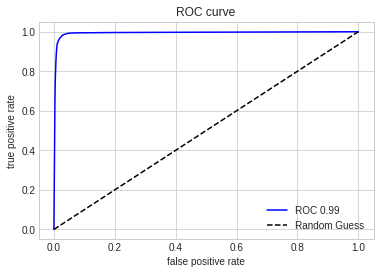

In [ ]:
from sklearn.metrics import roc_auc_score
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# roc curve
plt.plot(fpr, tpr, "b", label='ROC %0.2f' % roc_auc)
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

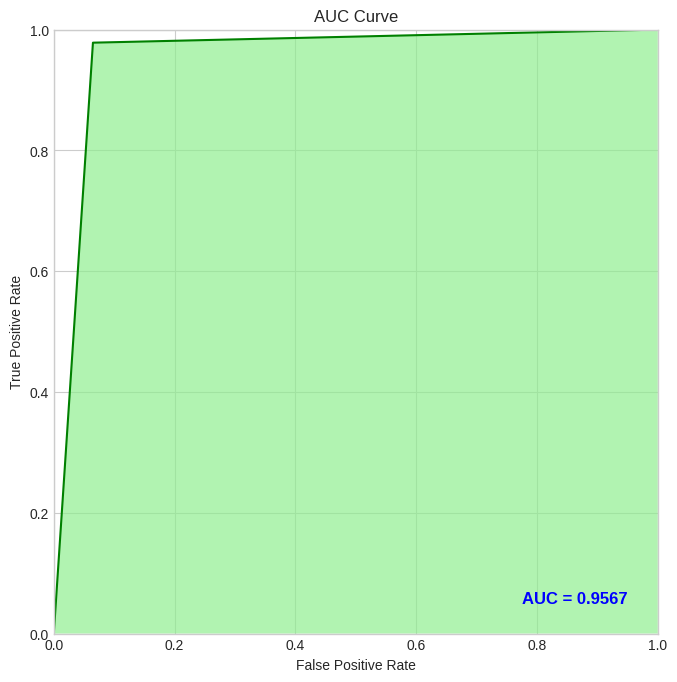

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9772346368715084


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9783187017823889




```
# LinearRegression
```
#LinearRegression


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.713205144959428

In [ ]:
# Make predictions for the test set
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9751313252210919

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.97519722, 0.97493684])

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9753258845437617

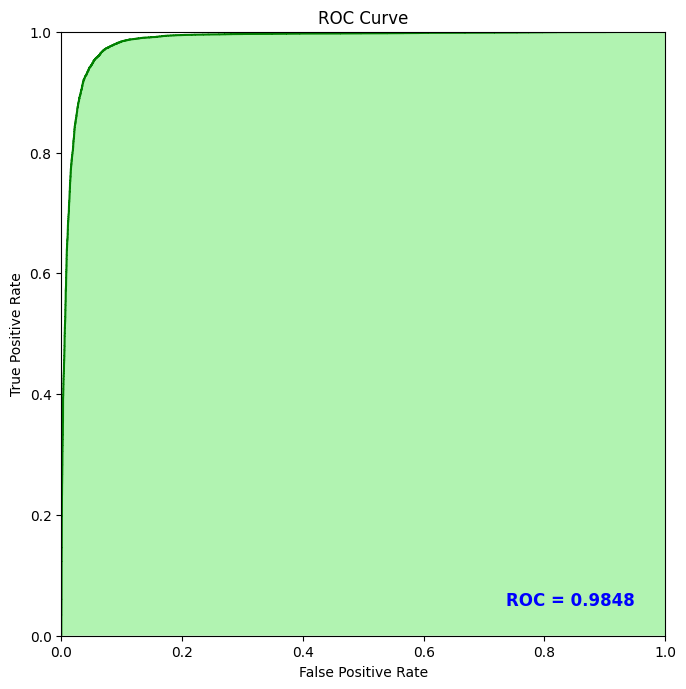

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'ROC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

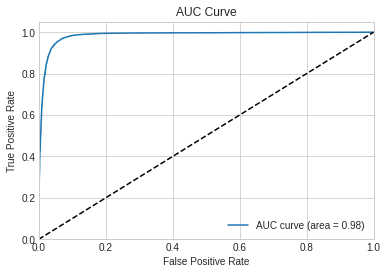

In [ ]:
##lets Plot the ROC with auc value
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,y_pred)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='AUC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 95.674823086981
Specificity:  95.674823086981



```
# GaussianNB
```
# GaussianNB

In [ ]:
#I use Gussian as GNB for short
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.9201


In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=nb.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9201
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     13643
           1       0.96      0.89      0.92     16357

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000

Confusion matrix:
[[13105  1859]
 [  538 14498]]


ROC AUC: 0.9200


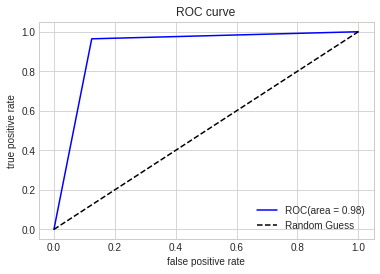

In [ ]:
from sklearn.metrics import roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_pred)

score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")
# roc curve
plt.plot(fpr, tpr, "b", label='ROC(area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

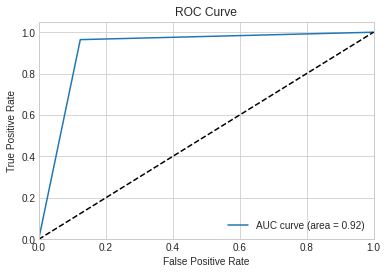

In [ ]:
##lets Plot the ROC with auc value
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,y_pred)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='AUC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.964219207235967


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9605658579491314


```
# KNN
```
## KNN

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9750666666666666


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14587   377]
 [  371 14665]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     14964
           1       0.97      0.98      0.98     15036

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ROC AUC: 0.98


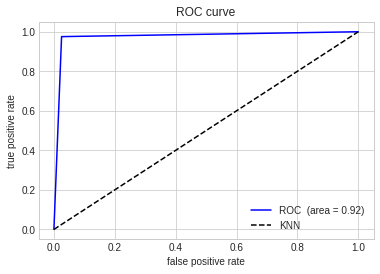

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.2f}")
# roc curve
plt.plot(fpr, tpr, "b", label='ROC  (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], "k--", label='KNN')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9750660430470746

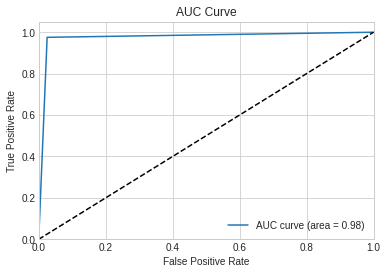

In [ ]:
##lets Plot the ROC with auc value
from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,y_pred)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='AUC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9751972188795294


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9753258845437617
